### Bidirectional RNN:

In [2]:
import numpy as np 
import pandas as pd
import os

In [3]:
import nltk
from nltk.corpus import stopwords

import keras
import tensorflow as tf
from tensorflow import keras

Using TensorFlow backend.
/Users/yuyunzhi/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/yuyunzhi/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/yuyunzhi/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/yuyunzhi/opt/anaconda3/lib/p

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow.keras.layers as L
#from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import accuracy_score

In [5]:
data = pd.read_csv('rotten_tomatoes_reviews.csv')
data.head()

,Freshness,Review
0,1,"Manakamana doesn't answer any questions, yet ..."
1,1,Wilfully offensive and powered by a chest-thu...
2,0,It would be difficult to imagine material mor...
3,0,Despite the gusto its star brings to the role...
4,0,If there was a good idea at the core of this ...


In [6]:
data = data.iloc[:100000,:]

In [7]:
text = data['Review'].values
sentiment = data['Freshness'].values

In [8]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)

In [9]:
sequence_text = tokenizer.texts_to_sequences(text)

In [10]:
sequence_text = pad_sequences(sequence_text,padding="post")

In [11]:
x_train , x_test , y_train ,y_test = train_test_split(sequence_text,sentiment,
                                                      test_size=0.3,random_state=11)

In [12]:
VOCAB_SIZE = len(tokenizer.word_index)+1
EMBEDDING_VEC = 30

In [13]:
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Embedding
from keras.models import Sequential

In [14]:
from keras.layers import LSTM
from keras.layers import SpatialDropout1D

In [15]:
from keras.layers import Bidirectional

In [16]:
model_lstm_bid = Sequential()
model_lstm_bid.add(Embedding(VOCAB_SIZE, 64, input_length=x_train.shape[1]))
model_lstm_bid.add(SpatialDropout1D(0.4))
model_lstm_bid.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
model_lstm_bid.add(Dense(1,activation='sigmoid'))
model_lstm_bid.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [30]:
model_lstm_bid.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 54, 64)            3813056   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 54, 64)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               197632    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 4,010,945
Trainable params: 4,010,945
Non-trainable params: 0
_________________________________________________________________


In [17]:
history_lstm_bid_3 = model_lstm_bid.fit(x_train,y_train, epochs=5, batch_size=64, validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 63000 samples, validate on 7000 samples
Epoch 1/5
63000/63000 [==============================] - 184s 3ms/step - loss: 0.5388 - accuracy: 0.7225 - val_loss: 0.4594 - val_accuracy: 0.7847
Epoch 2/5
63000/63000 [==============================] - 218s 3ms/step - loss: 0.3847 - accuracy: 0.8329 - val_loss: 0.4459 - val_accuracy: 0.7969
Epoch 3/5
63000/63000 [==============================] - 205s 3ms/step - loss: 0.3111 - accuracy: 0.8710 - val_loss: 0.4544 - val_accuracy: 0.8017
Epoch 4/5
63000/63000 [==============================] - 187s 3ms/step - loss: 0.2608 - accuracy: 0.8946 - val_loss: 0.5152 - val_accuracy: 0.7907
Epoch 5/5
63000/63000 [==============================] - 198s 3ms/step - loss: 0.2206 - accuracy: 0.9120 - val_loss: 0.5040 - val_accuracy: 0.7986


In [19]:
score,acc = model_lstm_bid.evaluate(x_test, y_test, verbose = 2, batch_size = 64)
print("score: %.2f" % (score))
print("acc: %.4f" % (acc))

score: 0.51
acc: 0.7945


In [20]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

In [22]:
pred = model_lstm_bid.predict(x_test)

In [24]:
pred = [0 if ele < 0.5 else 1 for ele in pred]

In [25]:
cm = confusion_matrix(y_test,pred)
cm

array([[12101,  2958],
       [ 3208, 11733]])

In [26]:
print(classification_report(y_test, pred, target_names = ['Bad Reviews','Good Reviews']))

              precision    recall  f1-score   support

 Bad Reviews       0.79      0.80      0.80     15059
Good Reviews       0.80      0.79      0.79     14941

    accuracy                           0.79     30000
   macro avg       0.79      0.79      0.79     30000
weighted avg       0.79      0.79      0.79     30000



Text(69.0, 0.5, 'Actual')

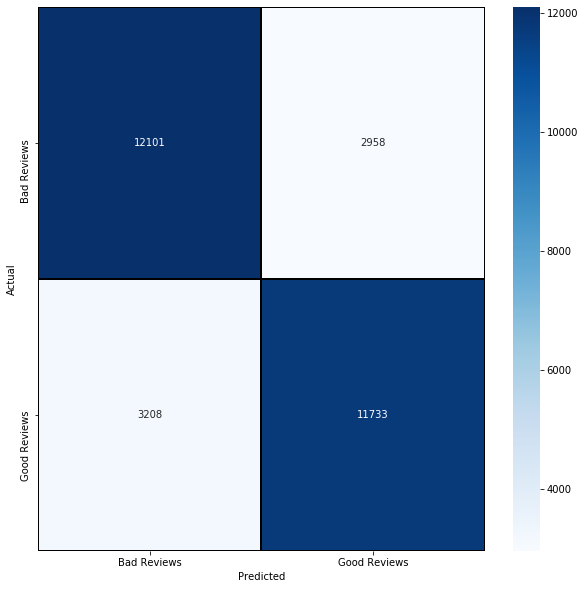

In [28]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Bad Reviews','Good Reviews'] , yticklabels = ['Bad Reviews','Good Reviews'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [31]:
x_train.shape

(70000, 54)

In [32]:
x_test.shape

(30000, 54)